In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.test.is_gpu_available():
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [4]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [5]:
def show_batch(image_batch, label_batch):
    print("image_batch_shape {}".format(image_batch.shape))
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        if label_batch != "":
            plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

In [6]:
def show_batch_grayscale(image_batch, label_batch):
    print("image_batch_shape {}".format(image_batch.shape))
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.squeeze(image_batch[n]), cmap='gray',interpolation='none')
        if label_batch != "":
            plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

In [7]:
import pathlib
data_dir = pathlib.Path("/home/hnkulkarni/nn/CS230/Project/trashnet/data/dataset-resized/dataset-resized")

In [8]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['plastic', 'metal', 'glass', '.DS_Store', 'paper', 'trash',
       'cardboard'], dtype='<U9')

In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

2527

In [10]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [11]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [12]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 2527 images belonging to 7 classes.


image_batch_shape (32, 224, 224, 3)


/home/hnkulkarni/envs/cs230/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


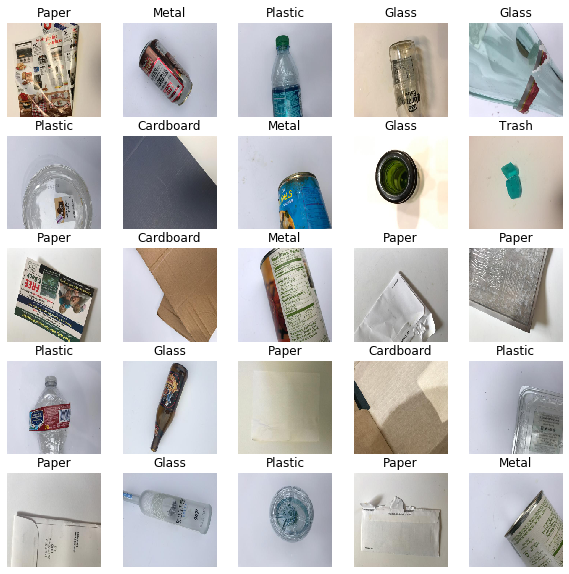

In [13]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [14]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

In [16]:
Y_proba = model.predict(image_batch)

In [18]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(image_batch)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

Image #0
  n01930112 - nematode     14.26%
  n03041632 - cleaver      4.56%
  n03838899 - oboe         4.23%

Image #1
  n01930112 - nematode     13.42%
  n03041632 - cleaver      3.59%
  n03838899 - oboe         3.13%

Image #2
  n01930112 - nematode     14.35%
  n03041632 - cleaver      3.14%
  n03838899 - oboe         2.93%

Image #3
  n01930112 - nematode     14.44%
  n03041632 - cleaver      3.14%
  n03838899 - oboe         2.84%

Image #4
  n01930112 - nematode     14.51%
  n03041632 - cleaver      3.01%
  n03838899 - oboe         2.77%

Image #5
  n01930112 - nematode     14.13%
  n03041632 - cleaver      3.02%
  n03838899 - oboe         2.83%

Image #6
  n01930112 - nematode     13.79%
  n03041632 - cleaver      2.60%
  n03838899 - oboe         2.47%

Image #7
  n01930112 - nematode     14.09%
  n03041632 - cleaver      3.07%
  n03838899 - oboe         2.75%

Image #8
  n01930112 - nematode     15.74%
  n03041632 - cleaver      2.98%
  n03838899 - oboe         2.55%

Image #9
 